In [55]:
# Import Statements
from numpy import genfromtxt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.animation as animation

C:\Users\Justin\AppData\Local\Temp\ipykernel_2804\1826599550.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df_train.mean()


Initial weights: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Learning rate of 0.3 was used. Big learning rate is good!! Do not use small learning rate.
[942.29751704]
Final weights:  [[ 3.97441181]
 [-3.07906178]
 [-2.4768907 ]
 [-1.74916399]]
Final Cost:  [364.84254092]


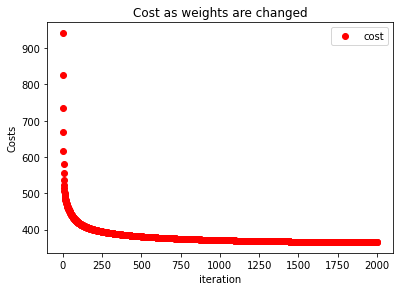

Test data (10 percent of all data)
Tested Accuracy 83.3333 percent


In [56]:
# use pandas to read csv file of training data
df_train = pd.read_csv("Titanic_train.csv")
# change sex from a string data format to a binary format
df_train["Sex"]= df_train["Sex"].map({"male":1, "female":0})

# replacing all unknown values with the mean value of the respective column
column_means = df_train.mean()
df_train = df_train.fillna(column_means)
# x1 contains the 3 training values we are interested in: class, age, and sex
x1 = df_train.iloc[:, [2, 4, 5]]
# X_total adds the bias column
X_Total = np.c_[np.ones(x1.shape[0]),x1]
"""
feature engineering block comment
to summarize, the above code aggregated all the explanatory variables
below, we feature scale all the variables by dividing through by the max in each column

afterward, the Y values are retrieved using iloc. Y values describe whether a
passenger survived or not, and is a binary variable.
finally, train_test_split is used to split all of this into training (90 percent) and test (10 percent)
"""
for i in range(len(X_Total[0])):
    X_Total[:, i] = (X_Total[:, i])/X_Total[:, i].max()
Y_Total = np.c_[df_train.iloc[:, 1]]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Total, Y_Total, test_size = 0.1)

"""
calcCost function block comment
exponent calculates the exponent that will be raised for the sigmoid function
predictions are found using sigmoid function
reshaped in order to make looping nicer
cost function is done using if statements, costs appended and summed in costList
"""
def calcCost(X,W,Y):
    exponent = -1*np.dot(X,W)
    predictions = 1/(1+np.exp(exponent))
    predictions = np.reshape(predictions, Y.shape)
    costList = []
    for i in range(Y.size):
        if Y[i] == 0:
            costList.append(-np.log(1-predictions[i]))
            
        elif Y[i] == 1:
            costList.append(-np.log(predictions[i]))
            
    cost = sum(costList)
    return cost

"""
calcGradient block comment
applies the logistic regression gradient function with some 
reshaping in order to return an appropriately dimensioned gradient
"""
def calcGradient(X,W,Y):
    exponent = -1*np.dot(X,W)
    predictions = 1/(1+np.exp(exponent))
    cost = predictions-np.reshape(Y, (len(Y),1))    
    grad = 1/len(Y)*(np.dot(np.reshape(cost, (len(cost[0]), len(cost))), X))
    return np.reshape(grad, (len(grad[0]), 1))


X = X_Train
Y = Y_Train

numCols = len(X[0])

W = np.zeros((numCols, 1)) + 0.5
print("Initial weights:", W)

lrList = [.3,.002]

lr = lrList[0]
print("Learning rate of " + str(lr) + " was used. Big learning rate is good!! Do not use small learning rate.")
#set up the cost array for graphing
costArray = []
costArray.append(calcCost(X, W, Y))
#initalize while loop flags
finished = False
count =0

"""
logistic regression loop block comment
same as linear regression
calculates gradient, updates weights
checks if gradient is uber tiny, if not, keep going until
specified number of trials.
weights are updated with learning rate specified above
"""

while (not finished and count <2000):
    gradient = calcGradient(X,W,Y)
    
    W = W - gradient*lr
    costArray.append(calcCost(X, W, Y))
    lengthOfGradientVector = np.linalg.norm(gradient)
    if (lengthOfGradientVector < .001):
        finished=True
    count+=1
print("Final weights: ", W)
print("Final Cost: ", calcCost(X,W,Y))
# Create figure objects
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8]
ax.plot(np.arange(len(costArray)), costArray, "ro", label = "cost")
ax.set_title("Cost as weights are changed")
ax.set_xlabel("iteration")
ax.set_ylabel("Costs")
ax.legend()
plt.show()

"""
accuracy calculation block comment
stick the weights with the testing data and round the values in order to give
a 0 or 1 prediction value
total correct / total values = accuracy
"""
correct = 0

test_preds = np.round_(1/(1+np.exp(-1*np.dot(X_Test, W))))

for i in range(len(test_preds)):
    if (test_preds[i]) == Y_Test[i]:
        correct += 1

accuracy = correct/len(test_preds)
print("Test data (10 percent of all data)")
print("Tested Accuracy " + str(round(accuracy*100, 4)) + " percent")

